
# Matematikai Programcsomagok

## 3. Előadás: Github, Scipy

### 2025 február 25.



# Github

<img src="filenames.png" alt="Drawing" style="width: 600px;"/>

## Verziókövetés 

Egy verziókövető rendszer alatt olyan eszözök összeségét értjük, melyek segítségével fájlok állapotának előzményeit tudjuk tárolni. Tehát egy verziókövető rendszer segítségével bármikor elmentheted a fájlaid aktuális állapotát és a korábbi állapotokat bármikor visszaállíthatod. 

- **Repository:** Egy tároló, ami tartalmazza a munkánk minden korábbi mentett változatát. 
- **Working directory:** Ahol éppen dolgozunk.

Az SVN-ek tipikus műveletei: 
<img src="svn.png" alt="Drawing" style="width: 1000px;"/>

 - `add`: fájl hozzáadása
 - `commit`: változtatás fájlokon, a wroking directory állapotát elmenjük a repositoryba
 - `delete`: fájl törlése
    
    
 - `diff`: egy fájl összehasonlítása a repositoryban szereplő verzióval
 - `status`: egész repository összehasonlítása a working directoryval
 - `log`: eddigi változtatások listája
 
 
 - `checkout`: working directory létrehozás a repository egy megadott verziója alapján 
 - `update`: a working directory frissítése  a repository alapján
 - `revert`: a working directory visszaállítása hogy egyező legyen a repository egy megadott állapotával

## Elosztott verziókövetés

Több repository van, cél, hogy mind ugyanazt tartalmazza. 

Egy lehetőség, hogy van egy központi repository. Ez többféle gondhoz is vezethet.

A Git nem ezt a modelt követi, hanem minden felhasználó rendelkezik a repository teljes másolatával. Így könnyű offline dolgozni, viszont időnként nehéz összehangolni a repositorykat. 


### Git (még nem Hub)

Tutorial: https://realpython.com/python-git-github-intro/

Interaktív vizualizáció: https://learngitbranching.js.org/


<img src="https://imgs.xkcd.com/comics/git.png" alt="Drawing" style="width: 400px;"/>


### .gitignore

A .gitignore egy szöveges fájl amiben megjelölhetjük, hogy mely fájlokat ne vegye figyelembe a git.
Például:

```
__pycache__
venv
env
.pytest_cache
.coverage```

#### Mit ne adjunk hozzá a repositoryhoz?

- Generált fájlokat, nem szöveges fájlokat (Túl nagyon és nem hatékony)
- Bizalmas információt. (Néha nem is gondolnál rá!!)

## GitHub

A gitre épülő rendszer, mely a távoli repositoryk fentartására lehet használni.



### Dolgozás távoli repositorykal 
A fő parancsok:

- `git clone`  Távoli repository alapján új repository
- `git fetch`  Távoli repository alapján megfelelő branchek frissítése
- `git pull`   Távoli repository alapján megfelelő branchek frissítése majd merge 
- `git push`   Távoli repository frissítése saját alapján

# Tudományos csomagok (Python Scientific stack)
|   csomag |    |
| --- | --- |
| NumPy | Hatékony N-dimenziós tömb |
| **SciPy** | **Numerikus számítások** |
| Matplotlib | Grafikonok és rajzok  |
| IPython (Jupyter) | Interaktív notebook |
| SymPy | Szimbolikus számítások |
| Pandas | Adatbányászat |

In [28]:
      %matplotlib inline
import sympy as sym
import math
import numpy as np
import matplotlib.pyplot as plt  
import scipy
 

# grafikonok stílusának beállítása
plt.rcParams['figure.figsize'] = (20, 10)

# Numerikus módszerek 
A numerikus számítások célja, hogy a matematikai számításokat végezzünk hatékonyan.

Előnyök:
 - Gyors, hatékony és pontos számítások.
 - Pontos elméleti eredmény hiánya mellett is alkalmazható.
 - Sok valóéletbeli helyzetben alakalmazható.
 
Hátrányok:
 - Csak közelítő eredményt ad.
 - Emiatt figyelni kell a hiábkra. 
 - A matematikai intuíciónkat hátráltatja elméleti kérdésekben. (pl felismernéd, hogy ez melyik algebrai szám közelítése? 2.732050807568877)
 

## SciPy

- A NumPy-ra épül. 
- A háttérben sokszor hatékonyabb nyelv fut, például Fortran. 

Részletes tutorial: https://docs.scipy.org/doc/scipy/reference/tutorial/



Alcsomagok:

|||
| --- | --- |
| scipy.cluster	| Vector quantization / Kmeans |
| scipy.constants |	Physical and mathematical constants |
|scipy.fftpack |	Fourier transform
|**scipy.integrate** |	**Integration routines**
|**scipy.interpolate** |	**Interpolation**
|scipy.io |	Data input and output
|**scipy.linalg** |	**Linear algebra routines**
|scipy.ndimage |	n-dimensional image package
|scipy.odr |	Orthogonal distance regression
|**scipy.optimize** |	**Optimization**
|**scipy.signal** |	**Signal processing**
|scipy.sparse |	Sparse matrices
|scipy.spatial |	Spatial data structures and algorithms
|scipy.special |	Any special mathematical functions
|**scipy.stats** |	**Statistics**|



### Lineáris algebra `scipy.linalg`

A numpy lineáris algebra csomagját bővíti ki. Pár függvény hatékonyabb a háttérben. 

#### LU felbontás
Adott $A$ mátrixot írjunk fel $A=LU$ alakban, ahol $L$ alsó, $U$ pedig felső háromszög mátrix.

In [57]:
from scipy import linalg, optimize

In [59]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)
print(A,p,l,u, sep="\n")
print(A - p @ l @ u)
np.allclose(A - p @ l @ u, np.zeros((4, 4)))

[[2 5 8 7]
 [5 2 2 8]
 [7 5 6 6]
 [5 4 4 8]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.12        1.          0.        ]
 [ 0.71428571 -0.44       -0.46153846  1.        ]]
[[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  6.28571429  5.28571429]
 [ 0.          0.         -1.04        3.08      ]
 [ 0.          0.          0.          7.46153846]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.8817842e-16 0.0000000e+00 4.4408921e-16 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.8817842e-16 0.0000000e+00 4.4408921e-16 0.0000000e+00]]


True

#### QR felbontás
Adott $A$ mátrixot írjunk fel $A=QR$ alakban, ahol $Q$ ortogonális, $R$ pedig felső háromszög mátrix.

In [60]:
A = np.random.randn(4, 4)
print(A)
q, r = linalg.qr(A)
print(q,r,sep='\n') 

[[-0.60871444  0.32410565 -0.64842692  1.59520634]
 [ 0.46612329  0.87244336  0.67373273  0.28211227]
 [ 1.12841357 -1.23228019 -0.16408961  0.54181422]
 [-0.16661964 -1.31912588 -0.58728707  0.90522145]]
[[-0.44290544 -0.00749944 -0.86893438  0.22075229]
 [ 0.339155   -0.5819868   0.01985144  0.73883095]
 [ 0.82104265  0.345083   -0.44512664 -0.0931073 ]
 [-0.12123377  0.73631029  0.2154559   0.6298637 ]]
[[ 1.37436657 -0.69948662  0.45216608 -0.27573661]
 [ 0.         -1.90670604 -0.87629077  0.67734598]
 [ 0.          0.          0.5233212  -1.42666993]
 [ 0.          0.          0.          1.080298  ]]


In [61]:
q @ q.T

array([[ 1.00000000e+00, -5.55111512e-17,  2.91433544e-16,
        -5.55111512e-17],
       [-5.55111512e-17,  1.00000000e+00,  5.55111512e-17,
         5.55111512e-17],
       [ 2.91433544e-16,  5.55111512e-17,  1.00000000e+00,
        -5.55111512e-17],
       [-5.55111512e-17,  5.55111512e-17, -5.55111512e-17,
         1.00000000e+00]])

In [13]:
q @ r

array([[ 1.9684081 , -0.05594698, -2.01087378,  1.56221405],
       [-0.14768296,  0.45586005, -0.10836551, -0.57658001],
       [-0.54938026, -0.32880831,  0.37200683, -0.24236173],
       [-2.2761058 ,  0.72668176,  0.34066164,  0.81845969]])

#### Lineáris egyenlet megoldás

Oldjuk meg az $Ax=y$ egyeneletet. 



In [29]:
A=np.array([[1,2],[3,4]])

In [30]:
y = np.array([[5.], [7.]])
x=np.linalg.solve(A, y)
x

array([[-3.],
       [ 4.]])

In [31]:
A @ x

array([[5.],
       [7.]])

## Integrálás `scipy.integrate`

Számístuk ki $\int_a^b f$ értékét.

A `scipy.integrate.quad(f, a, b)` integrálja $a$-tól $b$-ig az $f$ függvényt. Két értékkel tér vissza, az inregrálás eredményével és egy hibahatárral.

In [32]:
import scipy.integrate
f= lambda x:2*x
i = scipy.integrate.quad(f, 0, 1)
print(i)

(1.0, 1.1102230246251565e-14)


In [33]:
def f(x):
    return 2*x

i = scipy.integrate.quad(f, 0, 1)
print(i)

(1.0, 1.1102230246251565e-14)


In [34]:
f= lambda x:np.exp(-x**2)
i = scipy.integrate.quad(f, 0, 1)
print(i)

(0.7468241328124271, 8.291413475940725e-15)


In [35]:
## szimbolikus számítással
xval = sym.Symbol('x')
sym.integrate(sym.exp(-xval ** 2),  xval)

sqrt(pi)*erf(x)/2

In [77]:
((sym.erf(1)-sym.erf(0))*np.pi**(1/2)/2).evalf() 

0.746824132812427

#### Próbáljunk ki egy ronda függvényt

$$\int_0^1 e^{\sin(\log(x^2+x)-x)}dx$$

In [36]:
#sym.integrate(sym.exp(sym.sin(-sym.log(xval ** 2+xval)-xval)),  xval)

In [37]:
f= lambda x:np.exp(np.sin(-np.log(x ** 2+x)-x)) 
i = scipy.integrate.quad(f, 0, 1)
print(i)


(1.1008683826459191, 9.950209101106111e-09)


Több változóban is tudunk integrálni a ` scipy.integrate.dblquad(func, a, b, gfun, hfun)` paranccsal. A gfun és hfun parancsok adják meg a belső integrál határait. 


$$\int_{0}^{1/2} \left(  \int_{0}^{\sqrt{1-4y^2}} 16xy \:dx\right)dy$$


In [38]:
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : math.sqrt(1-4*y**2)
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print(i)

(0.5, 1.7092350012594845e-14)


## Interpoláció `scipy.interpolate`

A fő gondolat:
- Adott két adat tömb, $x_g$ és $y_g$, gondolhatunk rájuk úgy, hogy $y_g$ a mérési eredmény $x_g$ pontokban.
- Egy köztes $(x,y)$ adatpontot szeretnénk megbecsülni. 
- Ha adott $x_g,y_g$ és $x$, akkor mi legyen $y$?


Módszerek
- Illeszünk egy görbét a pontokra és értékeljük ki a görbét $x$-nél 
- Vegyük a legközelebbi adat pontot
- Lineárisan interpoláljunk
- Magasabb rendű polinommal interpoláljunk

Mi a különbség görbe illesztés és interpoláció között?

- Általában az interpoláció lokális, csak néhány környező adatpontot használ
- A görbe illesztés az összes pontra nézve próbál optimális görbét találni
- Ezért a görbe illesztés nem fog átmenni az adatpontokon általában
- Ezért a görbe illesztés akkor hasznos, ha az adat "zajos" és mi a zajtól szeretnénk megszabadulni vagy modelt szeretnénk felállítani



In [39]:
from scipy import interpolate
 
xg = np.linspace(0, 4, 12)
yg = np.cos(xg**2/3+4)
print (xg,'\n\n',yg)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] 

 [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


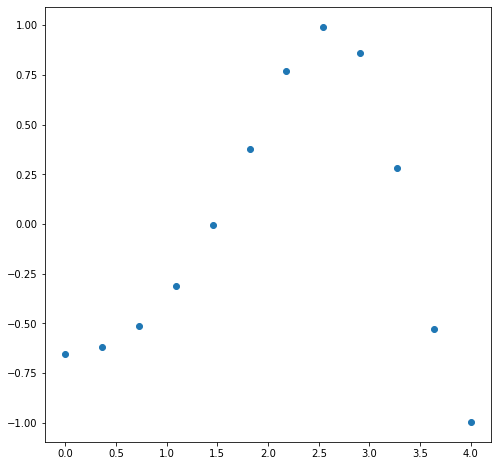

In [40]:
figure, axis = plt.subplots(1, 1,figsize=(8,8))
axis.plot(xg, yg,'o')
plt.show()

In [18]:
f1 = interpolate.interp1d(xg, yg,kind = 'linear')

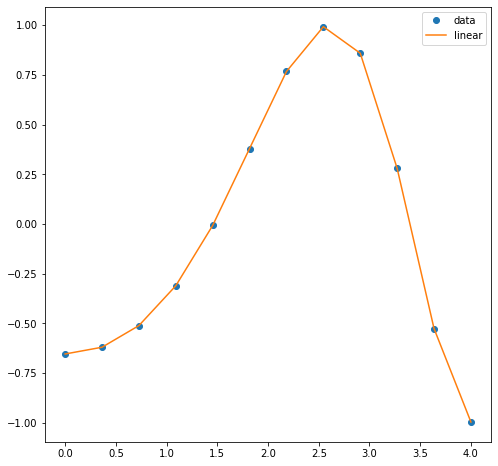

In [19]:
xnew = np.linspace(0, 4,100)

figure, axis = plt.subplots(1, 1,figsize=(8,8))
axis.plot(xg, yg, 'o')
axis.plot( xnew, f1(xnew), '-')
axis.legend(['data', 'linear'], loc = 'best')

plt.show()

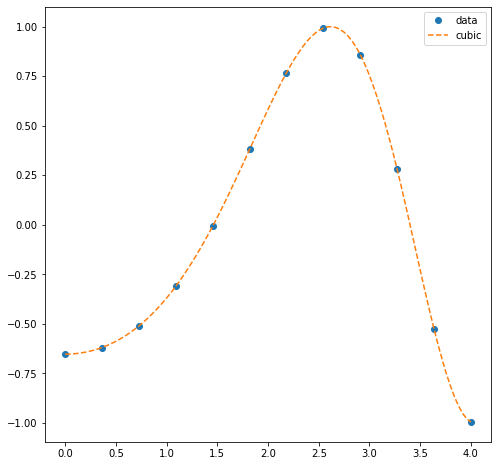

In [41]:
f2 = interpolate.interp1d(xg, yg, kind = 'cubic')
xnew = np.linspace(0, 4,100)
#plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
figure, axis = plt.subplots(1, 1,figsize=(8,8))
axis.plot(xg, yg, 'o')
#axis.plot( xnew, f1(xnew), '-')
axis.plot( xnew, f2(xnew), '--')
 
axis.legend(['data', 'cubic'], loc = 'best')

plt.show()

### Legkisebb négyzetek módszere


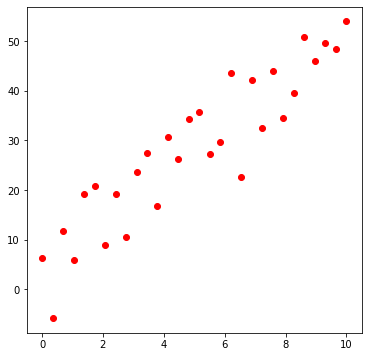

In [43]:
f = np.poly1d([5, 1])

x = np.linspace(0, 10, 30)
y = f(x) + 6*np.random.normal(size=len(x))
xn = np.linspace(0, 10, 200)

figure, axis = plt.subplots(1, 1,figsize=(6,6))
axis.plot(x, y, 'or')
plt.show()


In [44]:
a = np.vstack([x, np.ones(len(x))]).T
np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, y))

array([4.63176376, 5.39694623])

In [45]:
np.linalg.lstsq(a, y,rcond=None)[0]

array([4.63176376, 5.39694623])

In [46]:
np.polyfit(x, y, 1)

array([4.63176376, 5.39694623])

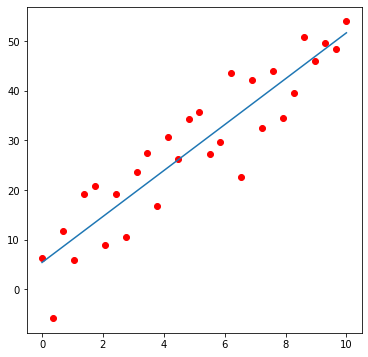

In [47]:
m, c = np.polyfit(x, y, 1)
yn = np.polyval([m, c], xn)

figure, axis = plt.subplots(1, 1,figsize=(6,6))
axis.plot(x, y, 'or')
axis.plot(xn, yn)
plt.show()

## Gyök keresés

Keressük a $2x+3cos(x)$ függvény egy gyökét.

A ` scipy.optimize.root(fn,x0)` függvényt használhatjuk. A hátterben különböző iteratív módszerek futnak, amik folyamatosan javítanak a megoldáson. A második paraméter a kezdeti tipp a gyökre.   


In [48]:
from scipy.optimize import root

def func(x):
    return 2*x + 3 * np.cos(x)

sol = root(func,0)
print(sol)


    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.65345532e-10])
       r: array([-4.37742425])
  status: 1
 success: True
       x: array([-0.91485648])


In [49]:
func(-0.91485648) 

-6.797106655298535e-09

In [50]:
sym.solveset( xval*2 + 2 * sym.cos(xval), xval) # a szimolikus megoldó csak széttárja a kezét.

ConditionSet(x, Eq(2*x + 2*cos(x), 0), Complexes(Reals x Reals, False))

## Optimalizáció `scipy.optimize`

Adott egy célfüggvény, amit bizonyos feltélek mellett szeretnék minimalizálni (maximalizálni). Például:

$$\min(x_0^3+x_1^2-x_2)$$
Feltéve hogy:
$$x_0^2+x_1^2=10 $$
$$x_0x_2\le4 $$
$$0\le x_0,x_1,x_2\le100$$

Legyen a kiindulási tipp (2,3,4)

In [52]:
from scipy.optimize import minimize

In [53]:
# cél és feltételek
def objective(x):
    return x[0]**3+x[1]**2-x[2] 

def constraint1(x):
    return x[0]**2+x[1]**2-10.0

def constraint2(x):
    return 4-x[0]*x[2]

In [54]:
#Kezdeti tipp
x0=np.array([2,3,4]) 

#Kezdeti érték
print("Cél függvény értéke a kiindulási pontban:",objective(x0))

Cél függvény értéke a kiindulási pontban: 13


In [55]:
# optimalizálás
b = (0.0,100.0)
bnds = (b, b, b)
con1 = {'type': 'eq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Cél függvény értéke: ' + str(objective(x)))

# print solution
print('Optimális értékek:')
print('x0 = ' + str(x[0]))
print('x1 = ' + str(x[1]))
print('x2 = ' + str(x[2]))

Cél függvény értéke: -89.9999999999999
Optimális értékek:
x0 = 0.0
x1 = 3.162277660168381
x2 = 99.99999999999991


In [56]:
#Ellenőrzés
print(constraint1(x))
print(constraint2(x))

8.881784197001252e-15
4.0


## Közönséges differenciálegyenletek

Oldjuk meg az $f'(x)=-kf(x)$ egyenletet. 

Használhatjuk az `scipy.integrate.odeint` függvényt.

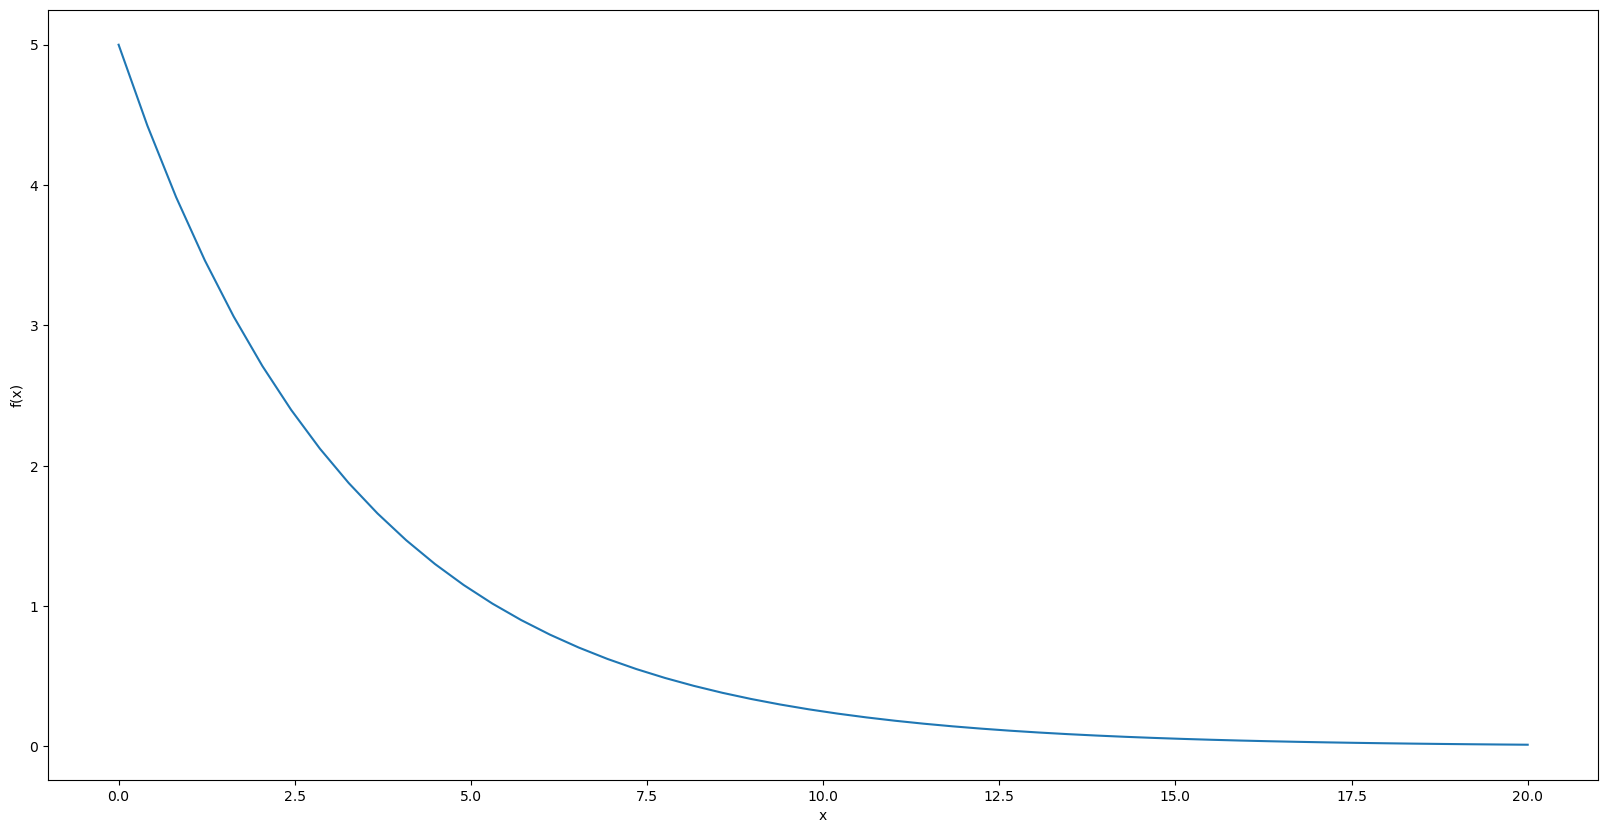

In [142]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# függvény, ami visszatért a derivált értékével
def model(f,x):
    k = 0.3
    deri = -k * f
    return deri

# kezdeti érték
f0 = 5

# x értékek, ahol ki akarjuk számolni a függvényt
x = np.linspace(0,20)

# egyenelet megoldása
f = odeint(model,f0,x)

# plot results
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Statisztika

In [143]:


# Create a sample dataset
data = np.array([4, 5, 1, 8, 2, 4, 5, 6])

# Calculate descriptive statistics
mean = scipy.mean(data)  # Mean
std = np.std(data)   # Standard deviation
var = np.var(data)   # Variance

print("Mean:", mean)
print("Standard deviation:", std)
print("Variance:", var)

Mean: 4.375
Standard deviation: 2.057759704144291
Variance: 4.234375


C:\Users\damasdi\AppData\Local\Temp\ipykernel_11088\1809093901.py:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean = scipy.mean(data)  # Mean


In [55]:
from scipy import stats
# Normal distribution
norm_dist = stats.norm(loc=5, scale=2)  # Mean = 5, standard deviation = 2

# Generate 10 random samples from normal distribution
norm_samples = norm_dist.rvs(size=10)
print("Normál minta:", norm_samples)

# Calculate probability density at x = 6
norm_prob = norm_dist.pdf(6)
print("Sűrűség az x = 6 pontban:", norm_prob)

# Uniform distribution
uniform_dist = stats.uniform(loc=1, scale=5)  # Minimum = 1, maximum = 6

# Generate 5 random samples from uniform distribution
uniform_samples = uniform_dist.rvs(size=5)
print("Uniform minta:", uniform_samples)

Normál minta: [8.97784518 4.33380818 2.64977976 0.22690142 4.53960378 5.91838727
 3.49235741 6.82849344 1.50061964 7.026921  ]
Sűrűség az x = 6 pontban: 0.17603266338214976
Uniform minta: [2.9690039  5.63339741 1.1504685  2.22011278 3.65022789]


In [50]:
# t-test for comparing means of two independent samples
data1 = np.array([10, 8, 12, 9, 11])
data2 = np.array([7, 6, 8, 9, 10])

t_test_result = stats.ttest_ind(data1, data2)
print("t-test eredmény:", t_test_result)

t-test eredmény: Ttest_indResult(statistic=2.0, pvalue=0.08051623795726257)


## Geometriai algoritmusok

- Alapvetően nem ajánlott, mivel a Scipy ezen a területen keveset tud

#### Delaunay háromszögelés

Adott egy ponthalmaz. Kössük össze azokat a pontpárokat, akikhez létezik olyan körlap, ami csak őket tartalmazza a ponthalmazból.

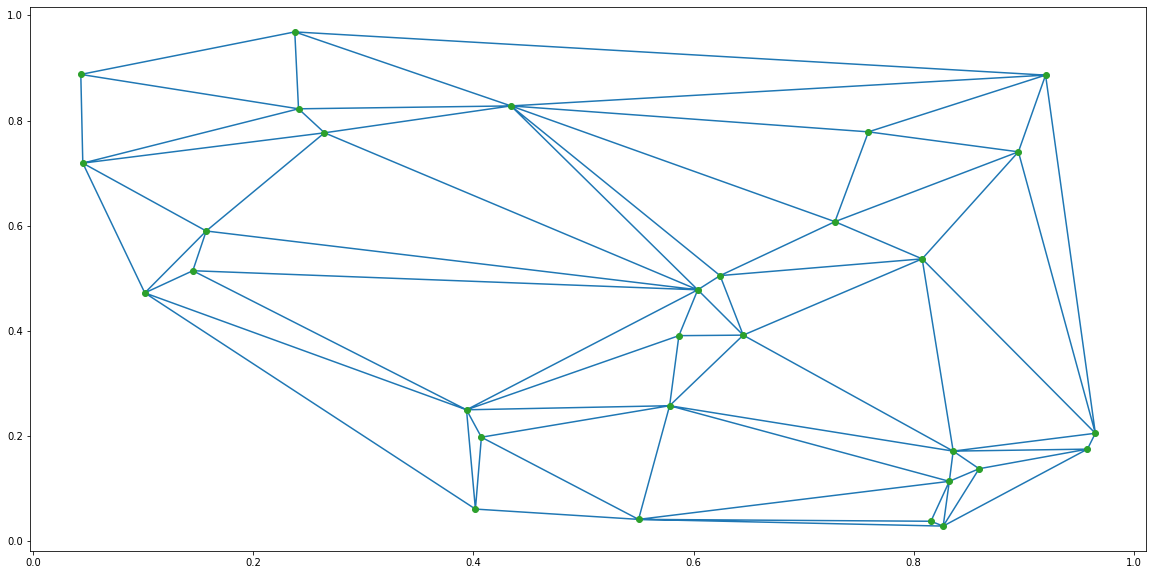

In [41]:
from scipy.spatial import Delaunay
points = np.random.rand(30, 2) # 30 random points in 2-D
tri = Delaunay(points)
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

#### Konvex burok
Adott egy ponthalmaz, számítsuk ki a konvex burkát.

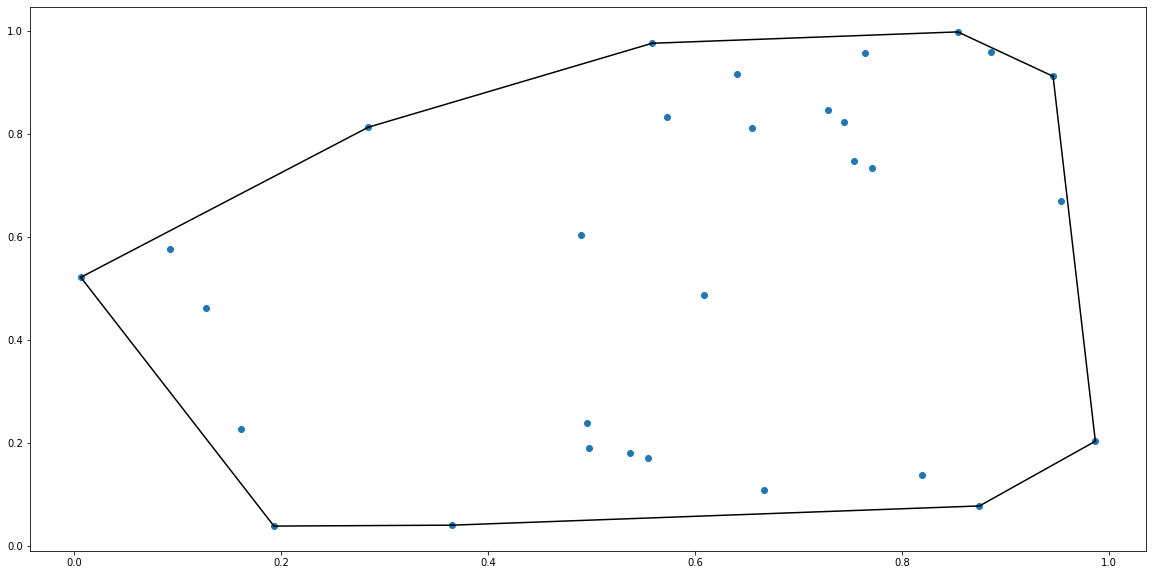

In [42]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2) # 30 random points in 2-D
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()